In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2 as cv
import glob
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import math
import os

input_folder="Photos/"

In [31]:
def get_silhouettes_from_input_folder(input_folder_location,exit_folder_location,apply_trim=False):
    silhouettes=[]
    content = os.listdir(input_folder_location)
    extensions=[".jpg",".png",".jpeg"]
    for file in content:
        if os.path.isfile(os.path.join(input_folder_location,file)) and os.path.splitext(file)[1].lower() in extensions:
            sil=get_silhouette_from_image(os.path.join(input_folder_location,file),apply_trim)
            silhouettes.append(sil)
    return silhouettes

def trim_image(image,margen):
        gris = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        #margen=0.16
        color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        h=color.shape[0]
        w=color.shape[1]
        margen_h=int(h*margen)
        margen_w=int(w*margen)
        color=color[int(h/2)-margen_h:int(h/2)+margen_h,int(w/2)-margen_w:int(w/2)+margen_w]
        image = color
        return image

def get_silhouette_from_image(input_image,apply_trim=False):
    original = cv.imread(cv.samples.findFile(input_image))

    #If you need to apply a trim operation, trim my image
    if(apply_trim):
        original=trim_image(original,margen=0.16)

    #Applying blur to obtain outline
    gris = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
    gauss = cv.medianBlur(gris, 5)
    canny = cv.Canny(gauss, 0, 150)
    (contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    #After obtain the outline, close the outline to be able to fill it
    black_background = np.zeros_like(original)
    cv.drawContours(black_background, contornos, -1, (0, 255, 0), -1)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
    imagen_cerrada = cv.morphologyEx(canny, cv.MORPH_CLOSE, kernel)
    (contornos,_) = cv.findContours(imagen_cerrada.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    #After obtain the outline, fill it up
    black_background = np.zeros_like(original)
    cv.drawContours(black_background, contornos, -1,(255,255,255), -1)
    plt.imshow(black_background)
    plt.figure()
    return black_background
    

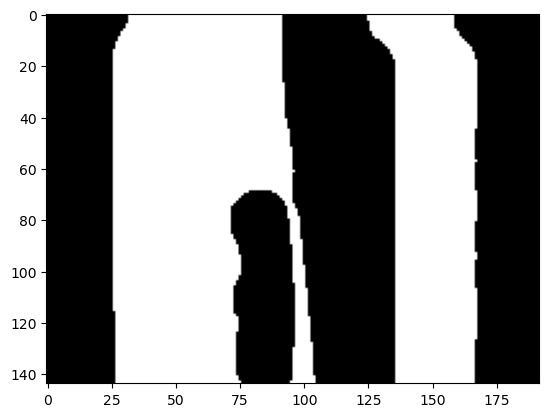

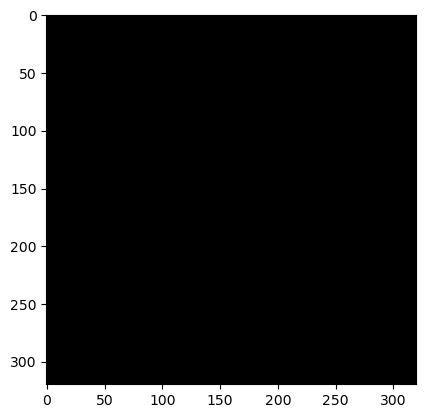

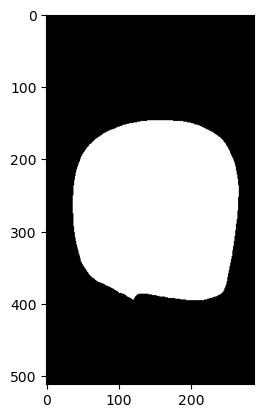

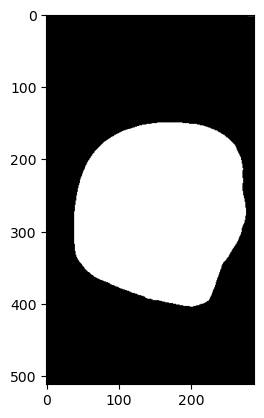

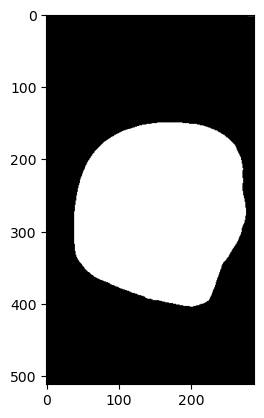

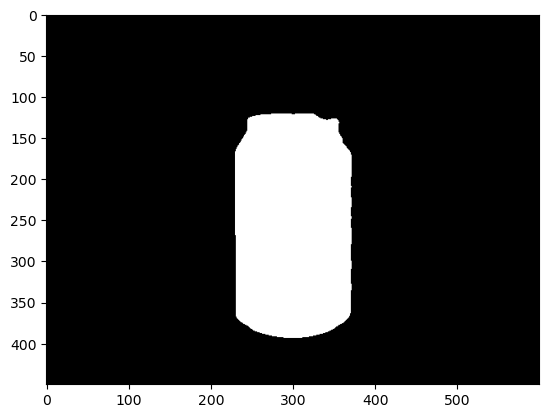

<Figure size 640x480 with 0 Axes>

In [32]:
data=get_silhouettes_from_input_folder(input_folder,"Photos/",True)
len(data)
d=get_silhouette_from_image("Photos/cocacola.jpg",False)

<Figure size 640x480 with 0 Axes>

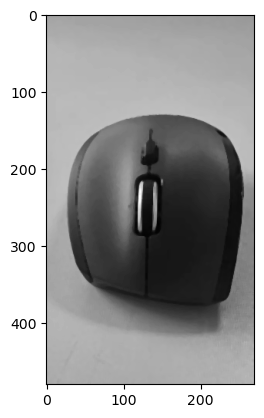

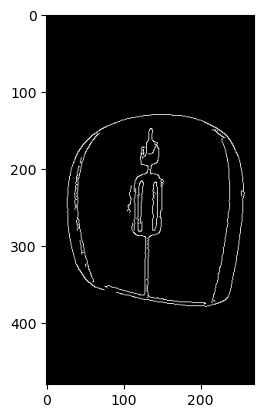

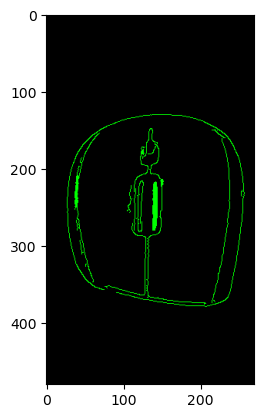

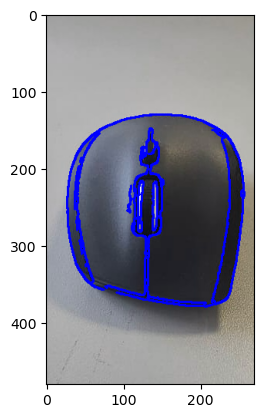

<Figure size 640x480 with 0 Axes>

In [7]:

 
# Cargamos la imagen
original = cv.imread(cv.samples.findFile("Photos/vista1.jpeg"))

# Convertimos a escala de grises
gris = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
margen=0.15
color = cv.cvtColor(original, cv.COLOR_BGR2RGB)
h=color.shape[0]
w=color.shape[1]
margen_h=int(h*margen)
margen_w=int(w*margen)
color=color[int(h/2)-margen_h:int(h/2)+margen_h,int(w/2)-margen_w:int(w/2)+margen_w]
cv.imwrite("Photos/vista1_recortado.jpeg",color)

original = cv.imread(cv.samples.findFile("Photos/vista1_recortado.jpeg"))
gris = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
 
# Aplicar suavizado Gaussiano
gauss = cv.medianBlur(gris, 5)
 
plt.imshow(gauss,cmap="gray")
plt.figure()

# Detectamos los bordes con Canny
canny = cv.Canny(gauss, 0, 150)
 
plt.imshow(canny,cmap="gray")
plt.figure()
# Buscamos los contornos
(contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

black_background = np.zeros_like(original)
cv.drawContours(black_background, contornos, -1, (0, 255, 0), -1)
plt.imshow(black_background)
plt.figure()
cv.drawContours(original,contornos,-1,(0,0,255), 2)
plt.imshow(original)
plt.figure()